# PyCon Italia 2024 Attendee Analysis

This notebook analyzes the attendees of the PyCon Italia 2024 conference. We will examine various aspects, such as the distribution of attendees by country, continent, nationality (Italian vs. non-Italian), and gender. 


In [16]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from collections import Counter
from countries import COUNTRIES
from colors import *

## Data loading

First, load the JSON data extracted from the Pretix API.

In [2]:
# Load data from JSON files
items_data = json.loads(Path("pyconit2024_items.json").read_text())
orders_data = json.loads(Path("pyconit2024.json").read_text())

## Extracting Ticket IDs

The data extracted from Pretix contains all the orders for the conference; we are interested only in the orders that contain the tickets for the conference, not the other items available on the website, such as T-shirts, hotels, PyDinner, etc. 

In [3]:
TICKET_CATEGORIES = {72, 73, 74}
ticket_ids = [item["id"] for item in items_data["results"] if item["category"] in TICKET_CATEGORIES]

## Flattening Orders Data

We will flatten the orders data to extract relevant information for analysis. Only orders that contain the specified ticket IDs and are not canceled will be considered.

In [4]:
orders_flat = []

for order in orders_data:
    for position in order["positions"]:
        if position["item"] in ticket_ids and order["status"] != "c":
            ticket_info = {
                "order_code": order["code"],
                "status": order["status"],
                "country": order["invoice_address"]["country"],
                "item": position["item"],
                "gender": next((a["answer"] for a in position["answers"] if a["question"] == 76), "--")
            }
            orders_flat.append(ticket_info)

print(f"Total Tickets Sold: {len(orders_flat)}")

Total Tickets Sold: 831


## Creating Counters for Analysis

We will now create counters to analyze the distribution of attendees by country, continent, nationality, and gender.

In [5]:
# Count attendees by country
country_counts = Counter([order["country"] for order in orders_flat])
country_counts

Counter({'IT': 504,
         'DE': 61,
         'GB': 47,
         'US': 34,
         'PL': 21,
         'CH': 17,
         'NL': 17,
         'NO': 14,
         'AT': 11,
         'BE': 11,
         'IN': 9,
         'LT': 9,
         'CZ': 7,
         'ES': 7,
         'IE': 6,
         'FR': 6,
         'SI': 5,
         'DK': 5,
         'CA': 4,
         'PT': 4,
         'RO': 4,
         'BR': 3,
         'RS': 3,
         'IS': 3,
         'AM': 3,
         'ZA': 2,
         'KE': 2,
         'LV': 1,
         'BG': 1,
         'GR': 1,
         'RW': 1,
         'GM': 1,
         'IL': 1,
         'UG': 1,
         'ID': 1,
         'AF': 1,
         'ET': 1,
         'LU': 1,
         'AE': 1})

In [6]:
# Count attendees by continent
continent_counts = Counter([COUNTRIES[order["country"]]["continent_name"] for order in orders_flat])
continent_counts

Counter({'Europe': 766,
         'North America': 38,
         'Asia': 16,
         'Africa': 8,
         'South America': 3})

In [7]:
# Count Italian vs Non-Italian attendees
it_non_it_counts = Counter(["IT" if order["country"] == "IT" else "Non-IT" for order in orders_flat])
it_non_it_counts

Counter({'IT': 504, 'Non-IT': 327})

In [8]:
# Count attendees by gender
gender_counts = Counter([order["gender"] for order in orders_flat])
gender_counts

Counter({'he/him': 569,
         'she/her': 153,
         '--': 86,
         'he/she/they': 6,
         'ey/em': 3,
         'it/its': 3,
         'fae/faer': 2,
         'xe/xem': 2,
         'he/she': 2,
         'he/they': 1,
         'hey/hem': 1,
         'ze/hir': 1,
         'thon/thons': 1,
         'e/em': 1})

## Plots

We will now analyze and visualize the data using various charts. The results will be saved for convenience.

In [9]:
# Set the general font properties
plt.rcParams["font.family"] = "General Sans"
plt.rcParams["font.size"] = 12
plt.rcParams['figure.facecolor'] = CREAM  # Default figure background color
plt.rcParams['axes.facecolor'] = CREAM  # Default axes background color
plt.rcParams['text.color'] = BLACK_INK           # Default text color
plt.rcParams['axes.labelcolor'] = BLACK_INK       # Default axes labels color
plt.rcParams['xtick.color'] = BLACK_INK           # Default x-tick color
plt.rcParams['ytick.color'] = BLACK_INK         # Default y-tick color
plt.rcParams['axes.titlecolor'] = BLACK_INK       # Default title color


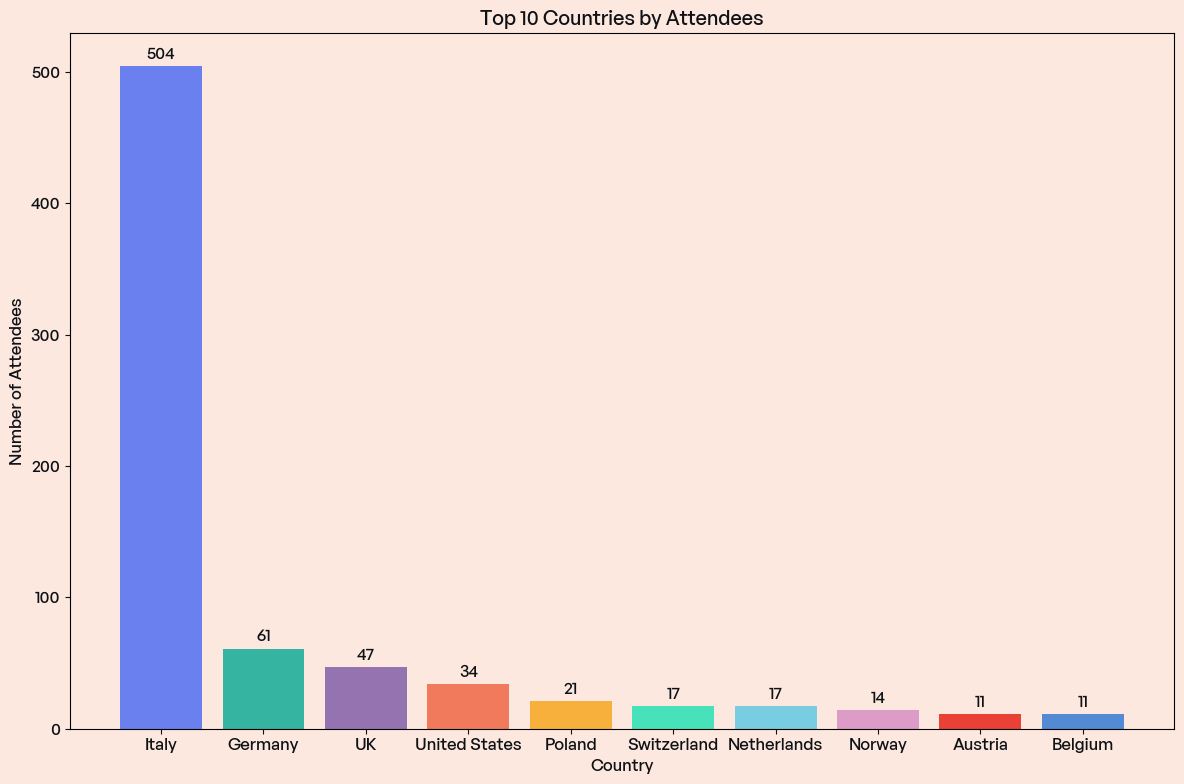

In [17]:
# Plotting Top 10 Countries


top_10_countries = country_counts.most_common(10)
countries, counts = zip(*top_10_countries)
country_names = [COUNTRIES[country]['name'] for country in countries]

plt.figure(figsize=(12, 8))
bars = plt.bar(country_names, counts, color=[DARK_BLUE, GREEN, PURPLE, CORAL, YELLOW, GREEN_4, BLUE, PINK, RED, NEUTRAL_BLUE])
plt.title('Top 10 Countries by Attendees')
plt.xlabel('Country')
plt.ylabel('Number of Attendees')
plt.xticks(ha='center')

# Adding bar labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('plots/pycon_2024_top_10_countries.png', bbox_inches='tight')
plt.show()

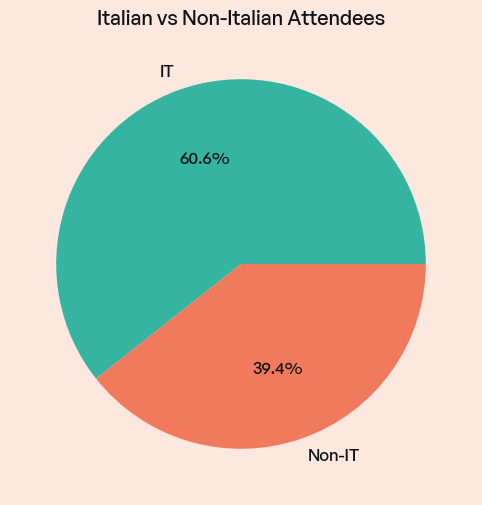

In [11]:
# Plotting Italian vs Non-Italian
labels = it_non_it_counts.keys()
sizes = it_non_it_counts.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=[GREEN, CORAL])
plt.title('Italian vs Non-Italian Attendees')
plt.savefig('plots/pycon_2024_italian_vs_non_italian.png', bbox_inches='tight')
plt.show()


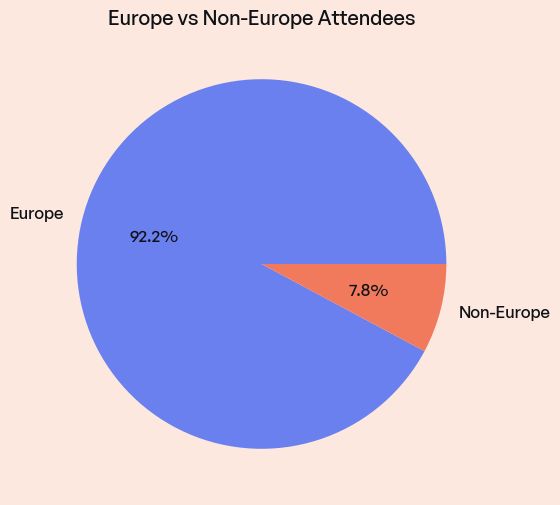

In [12]:
# Plotting Europe vs Non-Europe
europe_non_europe = {'Europe': 0, 'Non-Europe': 0}
for continent, count in continent_counts.items():
    if continent == 'Europe':
        europe_non_europe['Europe'] += count
    else:
        europe_non_europe['Non-Europe'] += count

labels = europe_non_europe.keys()
sizes = europe_non_europe.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=[DARK_BLUE, CORAL])
plt.title('Europe vs Non-Europe Attendees')
plt.savefig('plots/pycon_2024_europe_vs_non_europe.png', bbox_inches='tight')
plt.show()

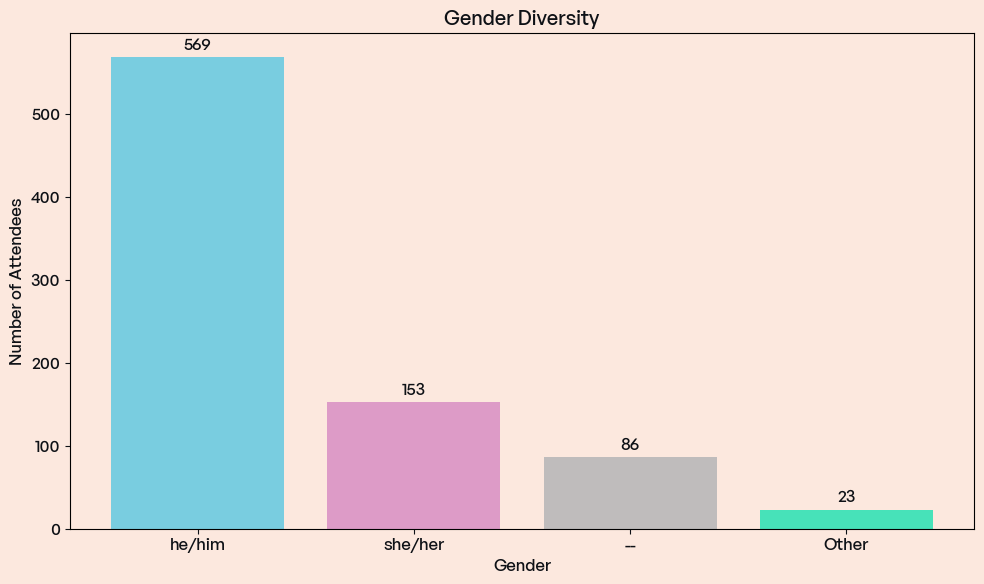

In [15]:
# Plotting Genders

gender_stats = {"he/him": 0, "she/her": 0, "--": 0, "Other": 0}
for pronouns, count in gender_counts.items():
    if pronouns in ("he/him", "she/her", "--"):
        gender_stats[pronouns] += count
    else:
        gender_stats["Other"] += count

labels = gender_stats.keys()
sizes = gender_stats.values()

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=[BLUE, PINK,GRAY_250, GREEN_4])
plt.title('Gender Diversity')
plt.xlabel('Gender')
plt.ylabel('Number of Attendees')
plt.xticks(ha='center')

# Adding bar labels
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.savefig('plots/pycon_2024_gender_diversity_bar.png', bbox_inches='tight')
plt.show()


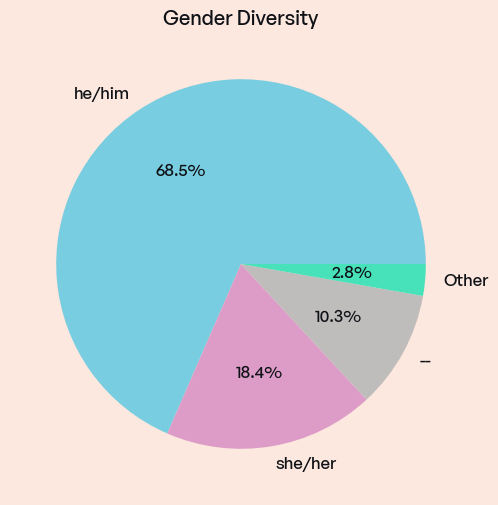

In [14]:
# Plotting Gender Diversity Pie Chart

plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    colors=[BLUE, PINK,GRAY_250, GREEN_4],
)
plt.title("Gender Diversity")
plt.savefig('plots/pycon_2024_gender_diversity_pie.png', bbox_inches='tight')
plt.show()
